In [2]:
import numpy as np 
import pandas as pd 
from sklearn import linear_model, tree
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from scipy import stats

In [3]:
# load the dataset 
wine_df = pd.read_csv('WineQT.csv')

In [4]:
wine_df.head(10)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   
5            7.4              0.66         0.00             1.8      0.075   
6            7.9              0.60         0.06             1.6      0.069   
7            7.3              0.65         0.00             1.2      0.065   
8            7.8              0.58         0.02             2.0      0.073   
9            6.7              0.58         0.08             1.8      0.097   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   
5                 13.0                  40.0   0.9978  3.51       0.56   
6                 15.0                  59.0   0.9964  3.30       0.46   
7                 15.0                  21.0   0.9946  3.39       0.47   
8                  9.0                  18.0   0.9968  3.36       0.57   
9                 15.0                  65.0   0.9959  3.28       0.54   

   alcohol  quality  Id  
0      9.4        5   0  
1      9.8        5   1  
2      9.8        5   2  
3      9.8        6   3  
4      9.4        5   4  
5      9.4        5   5  
6      9.4        5   6  
7     10.0        7   7  
8      9.5        7   8  
9      9.2        5  10

In [5]:
# check if there are any null values
wine_df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

In [6]:
# drop the id column
wine_df.drop(columns='Id', inplace=True)

# Descriptive statistics

In [7]:
wine_df.describe().round(3)

fixed acidity  volatile acidity  citric acid  residual sugar  \
count       1143.000          1143.000     1143.000        1143.000   
mean           8.311             0.531        0.268           2.532   
std            1.748             0.180        0.197           1.356   
min            4.600             0.120        0.000           0.900   
25%            7.100             0.392        0.090           1.900   
50%            7.900             0.520        0.250           2.200   
75%            9.100             0.640        0.420           2.600   
max           15.900             1.580        1.000          15.500   

       chlorides  free sulfur dioxide  total sulfur dioxide   density  \
count   1143.000             1143.000              1143.000  1143.000   
mean       0.087               15.615                45.915     0.997   
std        0.047               10.250                32.782     0.002   
min        0.012                1.000                 6.000     0.990   
25%        0.070                7.000                21.000     0.996   
50%        0.079               13.000                37.000     0.997   
75%        0.090               21.000                61.000     0.998   
max        0.611               68.000               289.000     1.004   

             pH  sulphates   alcohol   quality  
count  1143.000   1143.000  1143.000  1143.000  
mean      3.311      0.658    10.442     5.657  
std       0.157      0.170     1.082     0.806  
min       2.740      0.330     8.400     3.000  
25%       3.205      0.550     9.500     5.000  
50%       3.310      0.620    10.200     6.000  
75%       3.400      0.730    11.100     6.000  
max       4.010      2.000    14.900     8.000

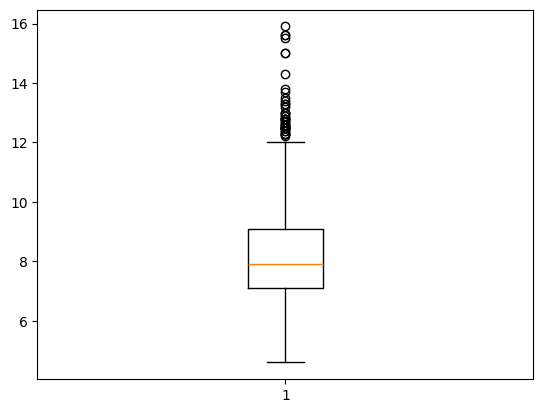

In [31]:
plt.boxplot(wine_df['fixed acidity']);

In [9]:
# group by quality
# average quantity of each feature, by quality group 
wine_quality = wine_df.groupby('quality').mean()
wine_quality

fixed acidity  volatile acidity  citric acid  residual sugar  \
quality                                                                 
3             8.450000          0.897500     0.211667        2.666667   
4             7.809091          0.700000     0.165758        2.566667   
5             8.161077          0.585280     0.240124        2.540476   
6             8.317749          0.504957     0.263680        2.444805   
7             8.851049          0.393671     0.386573        2.760140   
8             8.806250          0.410000     0.432500        2.643750   

         chlorides  free sulfur dioxide  total sulfur dioxide   density  \
quality                                                                   
3         0.105333             8.166667             24.500000  0.997682   
4         0.094788            14.848485             40.606061  0.996669   
5         0.091770            16.612836             55.299172  0.997073   
6         0.085281            15.215368             39.941558  0.996610   
7         0.075217            14.538462             37.489510  0.996071   
8         0.070187            11.062500             29.375000  0.995553   

               pH  sulphates    alcohol  
quality                                  
3        3.361667   0.550000   9.691667  
4        3.391212   0.637879  10.260606  
5        3.302091   0.613375   9.902277  
6        3.323788   0.676537  10.655339  
7        3.287133   0.743566  11.482634  
8        3.240625   0.766250  11.937500

Text(0, 0.5, 'Quantity')

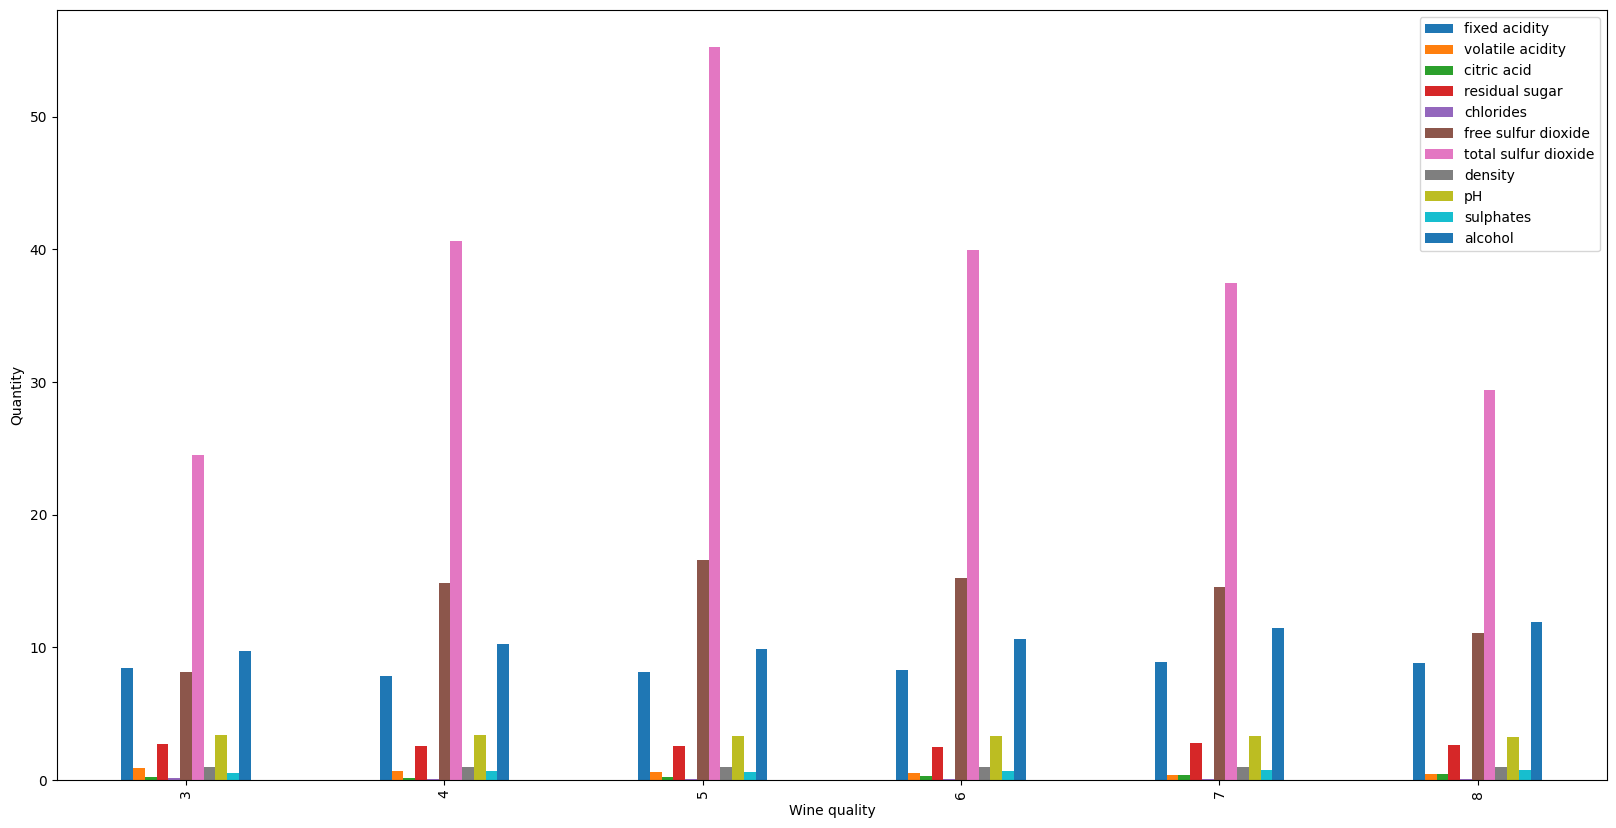

In [10]:
wine_quality.plot(kind="bar",figsize=(20,10))
plt.xlabel("Wine quality")
plt.ylabel("Quantity")

Correlation matrix


In [11]:
wine_df[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']].corr()

fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000         -0.250728     0.673157   
volatile acidity          -0.250728          1.000000    -0.544187   
citric acid                0.673157         -0.544187     1.000000   
residual sugar             0.171831         -0.005751     0.175815   
chlorides                  0.107889          0.056336     0.245312   
free sulfur dioxide       -0.164831         -0.001962    -0.057589   
total sulfur dioxide      -0.110628          0.077748     0.036871   
density                    0.681501          0.016512     0.375243   
pH                        -0.685163          0.221492    -0.546339   
sulphates                  0.174592         -0.276079     0.331232   
alcohol                   -0.075055         -0.203909     0.106250   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity               0.171831   0.107889            -0.164831   
volatile acidity           -0.005751   0.056336            -0.001962   
citric acid                 0.175815   0.245312            -0.057589   
residual sugar              1.000000   0.070863             0.165339   
chlorides                   0.070863   1.000000             0.015280   
free sulfur dioxide         0.165339   0.015280             1.000000   
total sulfur dioxide        0.190790   0.048163             0.661093   
density                     0.380147   0.208901            -0.054150   
pH                         -0.116959  -0.277759             0.072804   
sulphates                   0.017475   0.374784             0.034445   
alcohol                     0.058421  -0.229917            -0.047095   

                      total sulfur dioxide   density        pH  sulphates  \
fixed acidity                    -0.110628  0.681501 -0.685163   0.174592   
volatile acidity                  0.077748  0.016512  0.221492  -0.276079   
citric acid                       0.036871  0.375243 -0.546339   0.331232   
residual sugar                    0.190790  0.380147 -0.116959   0.017475   
chlorides                         0.048163  0.208901 -0.277759   0.374784   
free sulfur dioxide               0.661093 -0.054150  0.072804   0.034445   
total sulfur dioxide              1.000000  0.050175 -0.059126   0.026894   
density                           0.050175  1.000000 -0.352775   0.143139   
pH                               -0.059126 -0.352775  1.000000  -0.185499   
sulphates                         0.026894  0.143139 -0.185499   1.000000   
alcohol                          -0.188165 -0.494727  0.225322   0.094421   

                       alcohol  
fixed acidity        -0.075055  
volatile acidity     -0.203909  
citric acid           0.106250  
residual sugar        0.058421  
chlorides            -0.229917  
free sulfur dioxide  -0.047095  
total sulfur dioxide -0.188165  
density              -0.494727  
pH                    0.225322  
sulphates             0.094421  
alcohol               1.000000

# Linear Regression

Text(0.5, 0, 'Volatile acidity (g/dm3)')

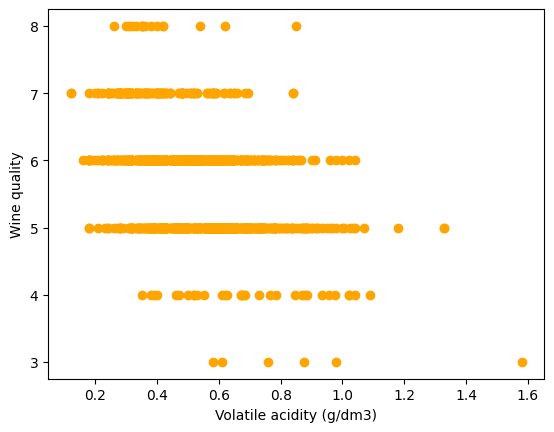

In [12]:
plt.scatter(wine_df['volatile acidity'], wine_df.quality, color='orange')
plt.ylabel("Wine quality")
plt.xlabel("Volatile acidity (g/dm3)")

Text(0, 0.5, 'Fixed acidity')

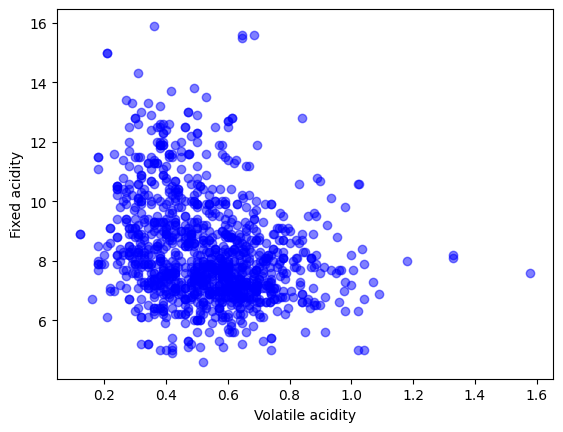

In [13]:
# LR
plt.scatter(wine_df['volatile acidity'], wine_df['fixed acidity'], color='blue', alpha=0.5)
plt.xlabel("Volatile acidity")
plt.ylabel("Fixed acidity")

Text(0, 0.5, 'Residual sugar')

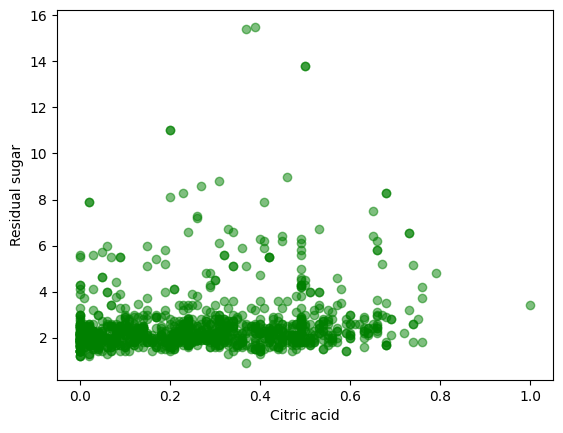

In [14]:
plt.scatter(wine_df['citric acid'], wine_df['residual sugar'], color='green', alpha=0.5)
plt.xlabel("Citric acid")
plt.ylabel("Residual sugar")

Text(0, 0.5, 'pH')

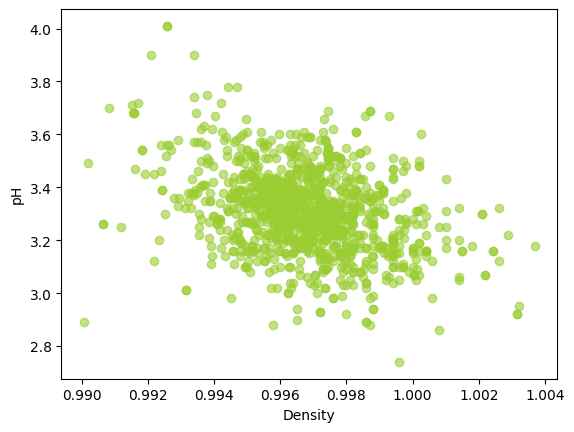

In [15]:
plt.scatter(wine_df['density'], wine_df['pH'], color='yellowgreen', alpha=0.6)
plt.xlabel("Density")
plt.ylabel("pH")

Text(0, 0.5, 'Sulphates')

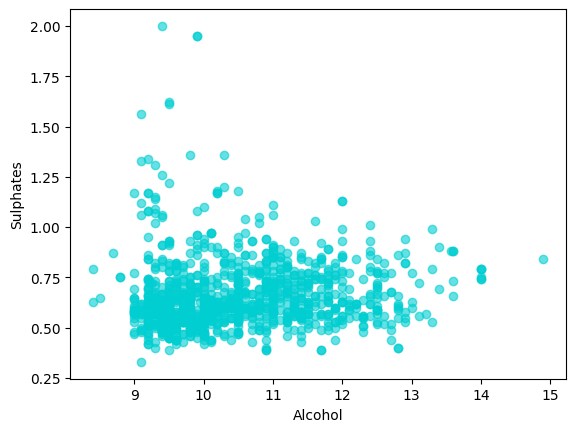

In [16]:
plt.scatter(wine_df['alcohol'], wine_df['sulphates'], color='darkturquoise', alpha=0.6)
plt.xlabel("Alcohol")
plt.ylabel("Sulphates")

Text(0, 0.5, 'Citric acid')

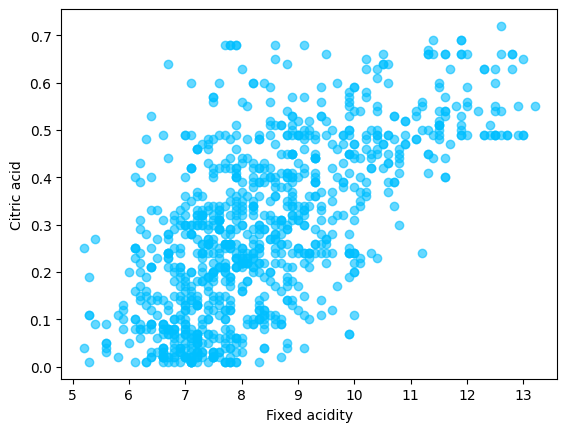

In [17]:
X = wine_df['fixed acidity']
y = wine_df['citric acid']

# remove outliers
x_low = X.quantile(0.01)
x_high = X.quantile(0.99)
y_low = y.quantile(0.01)
y_high = y.quantile(0.99)
df_filtered = wine_df[(X < x_high) & (X > x_low) & (y > y_low) & (y < y_high)]

X = df_filtered[['fixed acidity']]
y = df_filtered['citric acid']
plt.scatter(X, y, color='deepskyblue', alpha=0.6)
plt.xlabel('Fixed acidity')
plt.ylabel('Citric acid')

Intercept:  -0.32820724646190785
Coef:  0.07346971315708883


Text(0, 0.5, 'Citric acid')

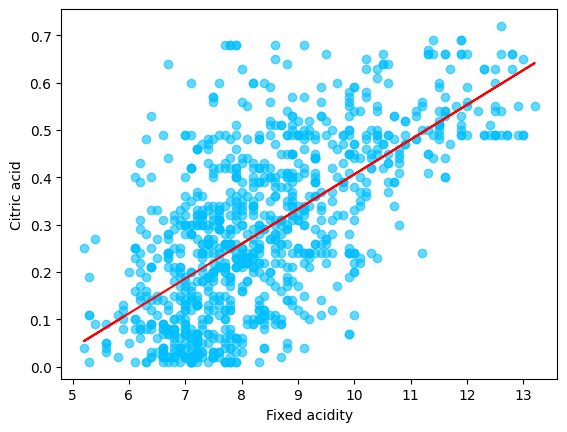

In [18]:
lm = linear_model.LinearRegression()
lm.fit(X,y)
print("Intercept: ", lm.intercept_)
print("Coef: ", lm.coef_[0])

plt.scatter(X,y, alpha=0.6,color='deepskyblue')
plt.plot(X, lm.predict(X), color='red')
plt.xlabel('Fixed acidity')
plt.ylabel('Citric acid')

[ 0.08104793 -0.00042032]


Text(0, 0.5, 'Citric acid')

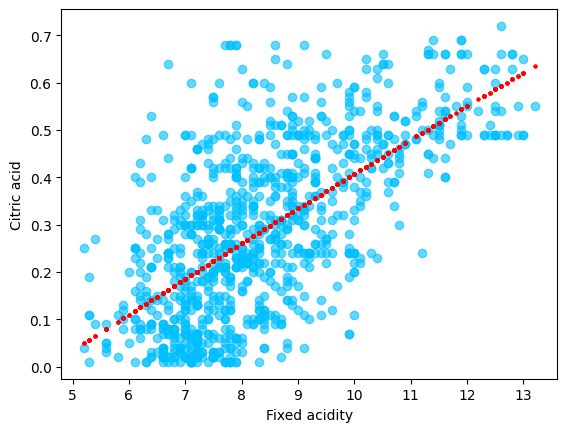

In [19]:
# Quadratic regression
quadratic = PolynomialFeatures(degree=2, include_bias=False)
X_quad = quadratic.fit_transform(X)
lm.fit(X_quad, y)
print(lm.coef_)

plt.scatter(X,y, color='deepskyblue', alpha=0.6)
plt.scatter(X, lm.predict(X_quad), color='red', s=5)
plt.xlabel('Fixed acidity')
plt.ylabel('Citric acid')

Text(0, 0.5, 'Fixed acidity')

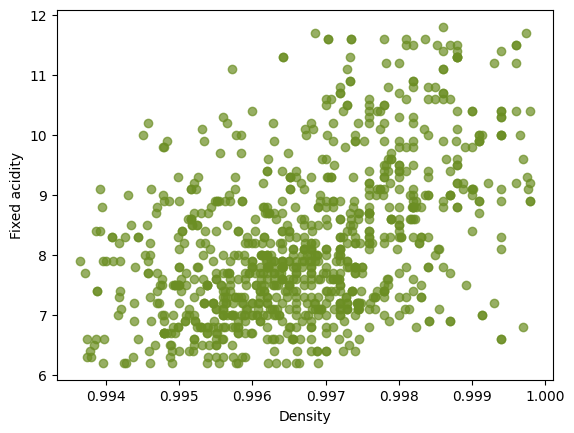

In [20]:
X = wine_df['density']
y = wine_df['fixed acidity']
x_low = X.quantile(0.05)
x_high = X.quantile(0.95)
y_low = y.quantile(0.05)
y_high = y.quantile(0.95)
df_filtered = wine_df[(X < x_high) & (X > x_low) & (y > y_low) & (y < y_high)]

X = df_filtered[['density']]
y = df_filtered['fixed acidity']

plt.scatter(X,y, color='olivedrab', alpha=0.7)
plt.xlabel('Density')
plt.ylabel('Fixed acidity')

Intercept:  -443.9156434206478
Coef:  453.58771203407167


Text(0, 0.5, 'Fixed acidity')

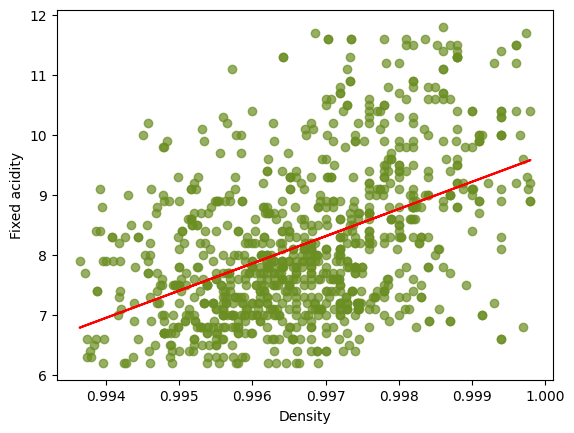

In [21]:
lm.fit(X,y)
print("Intercept: ", lm.intercept_)
print("Coef: ", lm.coef_[0])

plt.scatter(X,y,color='olivedrab', alpha=0.7)
plt.plot(X, lm.predict(X), color='red')
plt.xlabel('Density')
plt.ylabel('Fixed acidity')

[-172225.80807066   86619.88184291]


Text(0, 0.5, 'Fixed acidity')

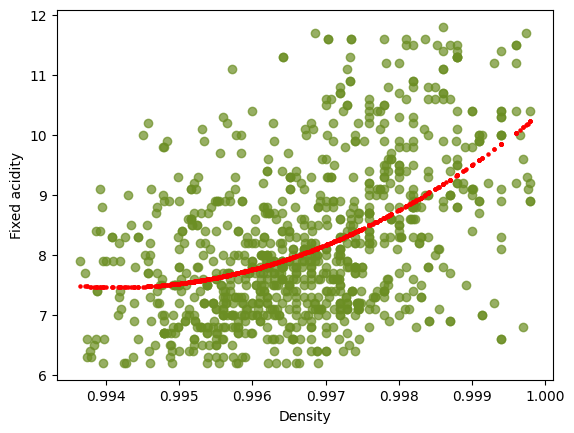

In [22]:
# Quadratic regression
quadratic = PolynomialFeatures(degree=2, include_bias=False)
X_quad = quadratic.fit_transform(X)
lm.fit(X_quad, y)
print(lm.coef_)

plt.scatter(X,y,color='olivedrab', alpha=0.7)
plt.scatter(X, lm.predict(X_quad), color='red', s=5)
plt.xlabel('Density')
plt.ylabel('Fixed acidity')

# Logistic Regression

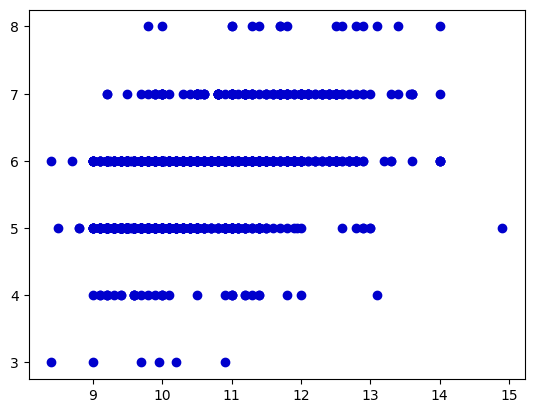

In [23]:
plt.scatter(wine_df.alcohol, wine_df.quality, color='mediumblue')

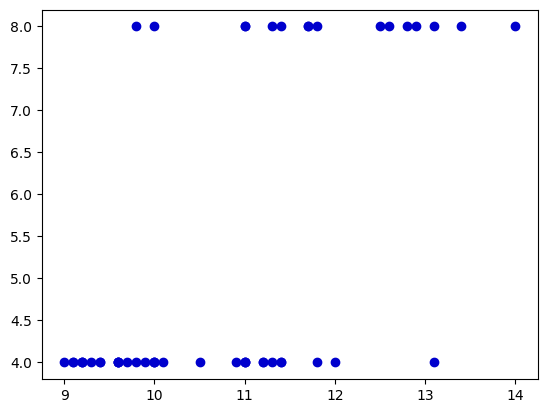

In [24]:
df_alcohol = wine_df[['alcohol', 'quality']]
df_alcohol = df_alcohol[df_alcohol['quality'].isin([4,8])]

X = df_alcohol[['alcohol']]
y = df_alcohol['quality']

plt.scatter(X,y, color='mediumblue')

Accuracy score: 0.8163265306122449


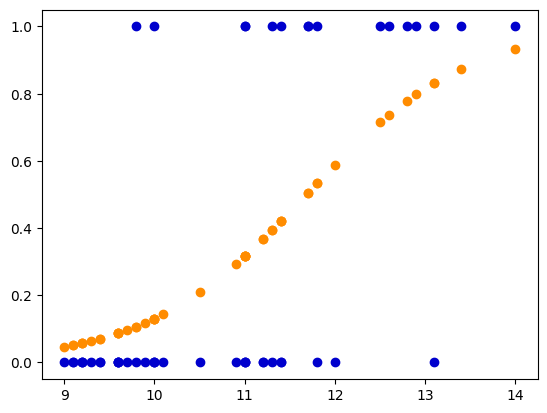

In [25]:
# map
y_true = y.map({4:0, 8:1})

# create and fit log reg
lm = linear_model.LogisticRegression()
lm.fit(X,y_true)

# plot log regression
plt.scatter(X,y_true, color='mediumblue')
plt.scatter(X, lm.predict_proba(X)[:,1], color='darkorange')

# get y_pred
y_pred = lm.predict(X)

# print acc score
print("Accuracy score: {}".format(accuracy_score(y_true, y_pred)))


In [26]:
# set X and y_true values
X = wine_df[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']]
y_true = wine_df['quality']

# predict class based on ALL features
lm = linear_model.LogisticRegression(max_iter=100000)

# fit model
lm.fit(X, y_true)

# get y_pred
y_pred = lm.predict(X)

# print accuracy score
print("Accuracy score: ", accuracy_score(y_true, y_pred))

Accuracy score:  0.6080489938757655


# Decision tree

In [27]:
# same thing but with decision tree :)

# set X and y values
X = df_alcohol[['alcohol']]
y = df_alcohol['quality']
y_true = y.map({4:0, 8:1})

# init Decision Tree Classifier
dtc = tree.DecisionTreeClassifier()

# fit Decision Tree Classifier
dtc.fit(X, y_true)

# get y_pred
y_pred = dtc.predict(X)

# print acc score
print("Accuracy score: {}".format(accuracy_score(y_true, y_pred)))

# DTC shows improvement...


Accuracy score: 0.8367346938775511


In [28]:
# set X and y_true values
X = wine_df[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']]
y_true = wine_df['quality']

# init Decision Tree Classifier
dtc = tree.DecisionTreeClassifier()

# fit Decision Tree Classifier
dtc.fit(X, y_true)

# get y_pred
y_pred = dtc.predict(X)

# print acc score
print("Accuracy score: {}".format(accuracy_score(y_true, y_pred)))

Accuracy score: 1.0


# Statistical test

In [29]:
# test if mean of class 4 is eq to mean of class 8 in alcohol
# using Mann-Whitney U-test
# TODO: check for normality
# h0: mean of class 4 = mean of class 8
# h1: mean of class 4 < mean of class 8

class4 = df_alcohol[df_alcohol.quality == 4]
class8 = df_alcohol[df_alcohol.quality == 8]

stats.mannwhitneyu(class4.alcohol, class8.alcohol)

# we can discard h0 in favor of h1
# we can reject the null hypothesis

MannwhitneyuResult(statistic=75.5, pvalue=5.972068792534113e-05)

In [30]:
# test if mean of class 6 is eq to mean of class 7 in alcohol
# using Mann-Whitney U-test
# TODO: check for normality
# h0: mean of class 6 = mean of class 7
# h1: mean of class 6 != mean of class 7

class6 = wine_df[wine_df.quality == 6]
class7 = wine_df[wine_df.quality == 7]

stats.mannwhitneyu(class6.alcohol, class7.alcohol)

# we can discard h0 in favor of h1
# we can reject the null hypothesis

MannwhitneyuResult(statistic=18288.0, pvalue=6.699846512288418e-16)